# **Problem Statement**
To develop a machine learning model to predict movie revenue using historical data. By analyzing features such as budget, popularity, vote count, genre, and ratings, we aim to understand the key factors that impact a movie’s financial performance. This analysis will help filmmakers, investors, and streaming platforms make informed decisions.

# **Objectives**
  * Analyze Revenue Patterns:

  * Find Key Revenue Drivers:

  * Genre & Market Trends:

  * Predict Upcoming Movies Revenue:


https://www.kaggle.com/datasets/bhargavchirumamilla/netflix-movies-and-tv-shows-till-2025


# **Dataset Overview**:-

**show_id** (int): Unique identifier for each movie.

**type** (str): Indicates whether the entry is a "Movie" or potentially another category.

**title** (str): Name of the movie.

**director** (str): Name(s) of the director(s).

**cast** (str): List of main actors in the movie.

**country** (str): Country/countries where the movie was produced.

**date_added** (str): Date when the movie was added to Netflix.

**release_year** (int): Year the movie was released.

**rating** (float): User rating of the movie.

**duration** (float, but all values are NaN): Appears to be an empty column.

**genres** (str): List of genres associated with the movie.

**language** (str): Language of the movie.

**description** (str): A brief summary of the movie.

**popularity** (float): Popularity score of the movie.

**vote_count** (int): Number of votes received.

**vote_average** (float): Average rating based on user votes.

**budget** (int): Production budget of the movie (in dollars).

**revenue** (int): Box office earnings (in dollars).


# **Understand the Data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder, StandardScaler


In [ ]:
df=pd.read_csv('/content/netflix_movies_detailed_up_to_2025 (1).csv')
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,language,description,popularity,vote_count,vote_average,budget,revenue
0,10192,Movie,Shrek Forever After,Mike Mitchell,"Mike Myers, Eddie Murphy, Cameron Diaz, Antoni...",United States of America,2010-05-16,2010,6.380,NaN,"Comedy, Adventure, Fantasy, Animation, Family",en,A bored and domesticated Shrek pacts with deal...,203.893,7449,6.380,165000000,752600867
1,27205,Movie,Inception,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ken W...","United Kingdom, United States of America",2010-07-15,2010,8.369,NaN,"Action, Science Fiction, Adventure",en,"Cobb, a skilled thief who commits corporate es...",156.242,37119,8.369,160000000,839030630
2,12444,Movie,Harry Potter and the Deathly Hallows: Part 1,David Yates,"Daniel Radcliffe, Emma Watson, Rupert Grint, T...","United Kingdom, United States of America",2010-11-17,2010,7.744,NaN,"Adventure, Fantasy",en,"Harry, Ron and Hermione walk away from their l...",121.191,19327,7.744,250000000,954305868
3,38757,Movie,Tangled,"Byron Howard, Nathan Greno","Mandy Moore, Zachary Levi, Donna Murphy, Ron P...",United States of America,2010-11-24,2010,7.600,NaN,"Animation, Family, Adventure",en,"Feisty teenager Rapunzel, who has long and mag...",111.762,11638,7.600,260000000,592461732
4,10191,Movie,How to Train Your Dragon,"Chris Sanders, Dean DeBlois","Jay Baruchel, Gerard Butler, Craig Ferguson, A...",United States of America,2010-03-18,2010,7.800,NaN,"Fantasy, Adventure, Animation, Family",en,As the son of a Viking leader on the cusp of m...,110.044,13259,7.800,165000000,494879471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,1440286,Movie,Festival de Viña del Mar 2025: Ha*Ash,NaN,Ha*ash,Chile,2025-02-24,2025,0.000,NaN,Music,es,NaN,4.931,0,0.000,0,0
15996,1271724,Movie,Man and Woman,Vladimir Kott,"Anna Kotova, Stepan Devonin, Pavel Derevyanko,...",Russia,2025-03-13,2025,0.000,NaN,Drama,ru,Poignant stories about men and women who have ...,4.930,0,0.000,0,0
15997,1426364,Movie,Night of the Dead Sorority Babes,"Angel Nichole Bradford, Steve Hermann","Jessa Flux, Lynn Lowry, Angel Nichole Bradford...",NaN,2025-01-28,2025,1.000,NaN,Horror,en,Two villainous entities initiate gorgeous soro...,4.922,1,1.000,0,0
15998,1411248,Movie,A Dunces Burden,Daniel Kowal,"Riley G, Mitchel Corrado",NaN,2025-03-10,2025,0.000,NaN,NaN,en,A Dunces Burden,4.921,0,0.000,0,0


 **View the first few rows**

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,language,description,popularity,vote_count,vote_average,budget,revenue
0,10192,Movie,Shrek Forever After,Mike Mitchell,"Mike Myers, Eddie Murphy, Cameron Diaz, Antoni...",United States of America,2010-05-16,2010,6.380,NaN,"Comedy, Adventure, Fantasy, Animation, Family",en,A bored and domesticated Shrek pacts with deal...,203.893,7449,6.380,165000000,752600867
1,27205,Movie,Inception,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ken W...","United Kingdom, United States of America",2010-07-15,2010,8.369,NaN,"Action, Science Fiction, Adventure",en,"Cobb, a skilled thief who commits corporate es...",156.242,37119,8.369,160000000,839030630
2,12444,Movie,Harry Potter and the Deathly Hallows: Part 1,David Yates,"Daniel Radcliffe, Emma Watson, Rupert Grint, T...","United Kingdom, United States of America",2010-11-17,2010,7.744,NaN,"Adventure, Fantasy",en,"Harry, Ron and Hermione walk away from their l...",121.191,19327,7.744,250000000,954305868
3,38757,Movie,Tangled,"Byron Howard, Nathan Greno","Mandy Moore, Zachary Levi, Donna Murphy, Ron P...",United States of America,2010-11-24,2010,7.600,NaN,"Animation, Family, Adventure",en,"Feisty teenager Rapunzel, who has long and mag...",111.762,11638,7.600,260000000,592461732
4,10191,Movie,How to Train Your Dragon,"Chris Sanders, Dean DeBlois","Jay Baruchel, Gerard Butler, Craig Ferguson, A...",United States of America,2010-03-18,2010,7.800,NaN,"Fantasy, Adventure, Animation, Family",en,As the son of a Viking leader on the cusp of m...,110.044,13259,7.800,165000000,494879471


**View the last few rows**

In [ ]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,language,description,popularity,vote_count,vote_average,budget,revenue
15995,1440286,Movie,Festival de Viña del Mar 2025: Ha*Ash,NaN,Ha*ash,Chile,2025-02-24,2025,0.0,NaN,Music,es,NaN,4.931,0,0.0,0,0
15996,1271724,Movie,Man and Woman,Vladimir Kott,"Anna Kotova, Stepan Devonin, Pavel Derevyanko,...",Russia,2025-03-13,2025,0.0,NaN,Drama,ru,Poignant stories about men and women who have ...,4.930,0,0.0,0,0
15997,1426364,Movie,Night of the Dead Sorority Babes,"Angel Nichole Bradford, Steve Hermann","Jessa Flux, Lynn Lowry, Angel Nichole Bradford...",NaN,2025-01-28,2025,1.0,NaN,Horror,en,Two villainous entities initiate gorgeous soro...,4.922,1,1.0,0,0
15998,1411248,Movie,A Dunces Burden,Daniel Kowal,"Riley G, Mitchel Corrado",NaN,2025-03-10,2025,0.0,NaN,NaN,en,A Dunces Burden,4.921,0,0.0,0,0
15999,1405742,Movie,Portal to Hell,Woody Bess,"Trey Holland, Keith David, Richard Kind, Micha...",United States of America,2025-02-22,2025,0.0,NaN,"Comedy, Horror",en,After a debt-collector finds a portal to hell ...,4.921,0,0.0,0,0


**Get a quick summary of the dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       16000 non-null  int64  
 1   type          16000 non-null  object 
 2   title         16000 non-null  object 
 3   director      15868 non-null  object 
 4   cast          15796 non-null  object 
 5   country       15534 non-null  object 
 6   date_added    16000 non-null  object 
 7   release_year  16000 non-null  int64  
 8   rating        16000 non-null  float64
 9   duration      0 non-null      float64
 10  genres        15893 non-null  object 
 11  language      16000 non-null  object 
 12  description   15868 non-null  object 
 13  popularity    16000 non-null  float64
 14  vote_count    16000 non-null  int64  
 15  vote_average  16000 non-null  float64
 16  budget        16000 non-null  int64  
 17  revenue       16000 non-null  int64  
dtypes: float64(4), int64(5), o

* **view number of rows and columns in  dataset.**

In [ ]:
df.shape

(16000, 18)

* **view for any missing values**:


In [ ]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,132
cast,204
country,466
date_added,0
release_year,0
rating,0
duration,16000


* **view for duplicate rows**

In [ ]:
df.duplicated().sum()

np.int64(0)

* **To quickly get a summary of important statistical details about the numeric columns in a DataFrame.**

In [ ]:
df.describe()

,show_id,release_year,rating,duration,popularity,vote_count,vote_average,budget,revenue
count,1.600000e+04,16000.000000,16000.000000,0.0,16000.000000,16000.000000,16000.000000,1.600000e+04,1.600000e+04
mean,5.266582e+05,2017.500000,5.956368,NaN,20.384728,718.656125,5.956368,8.766792e+06,2.446308e+07
std,3.794427e+05,4.609916,1.754741,NaN,68.610033,2080.198316,1.754741,2.912450e+07,1.116977e+08
min,1.890000e+02,2010.000000,0.000000,NaN,3.860000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,2.257258e+05,2013.750000,5.600000,NaN,7.840750,53.000000,5.600000,0.000000e+00,0.000000e+00
50%,4.468170e+05,2017.500000,6.300000,NaN,10.913500,138.000000,6.300000,0.000000e+00,0.000000e+00
75%,7.739808e+05,2021.250000,6.923000,NaN,17.336500,422.000000,6.923000,2.200000e+06,1.654473e+06
max,1.440471e+06,2025.000000,10.000000,NaN,3876.006000,37119.000000,10.000000,4.600000e+08,2.799439e+09


# **Data Preprocessing & Cleaning**

*  **0, budget and revenue fill with mean()**

In [ ]:
import numpy as np
df['budget'].replace(0, df['budget'].mean(), inplace=True)
df['revenue'].replace(0, df['revenue'].mean(), inplace=True)

<ipython-input-260-d65c1d6f0e33>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['budget'].replace(0, df['budget'].mean(), inplace=True)
<ipython-input-260-d65c1d6f0e33>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [ ]:
df.describe()

,show_id,release_year,rating,duration,popularity,vote_count,vote_average,budget,revenue
count,1.600000e+04,16000.000000,16000.000000,0.0,16000.000000,16000.000000,16000.000000,1.600000e+04,1.600000e+04
mean,5.266582e+05,2017.500000,5.956368,NaN,20.384728,718.656125,5.956368,1.487779e+07,4.029527e+07
std,3.794427e+05,4.609916,1.754741,NaN,68.610033,2080.198316,1.754741,2.751931e+07,1.088043e+08
min,1.890000e+02,2010.000000,0.000000,NaN,3.860000,0.000000,0.000000,1.000000e+00,2.000000e+00
25%,2.257258e+05,2013.750000,5.600000,NaN,7.840750,53.000000,5.600000,8.766792e+06,2.446308e+07
50%,4.468170e+05,2017.500000,6.300000,NaN,10.913500,138.000000,6.300000,8.766792e+06,2.446308e+07
75%,7.739808e+05,2021.250000,6.923000,NaN,17.336500,422.000000,6.923000,8.766792e+06,2.446308e+07
max,1.440471e+06,2025.000000,10.000000,NaN,3876.006000,37119.000000,10.000000,4.600000e+08,2.799439e+09


* **Drop Irrelevent columns**

In [ ]:
# drop irrelevet columns
df.drop(columns=['duration'],inplace=True)
df.drop(columns=['description'],inplace=True)
df.drop(columns=['type'], inplace=True)
df.drop(columns=['release_year'], inplace=True)


* **Convert columns to string type before applying string methods**

In [ ]:
# Convert columns to string type before applying string methods
df['genres'] = df['genres'].astype(str).str.lower().str.strip()
df['director'] = df['director'].astype(str).str.lower().str.strip()
df['cast'] = df['cast'].astype(str).str.lower().str.strip()
df['language'] = df['language'].astype(str).str.lower().str.strip()
df['country'] = df['country'].astype(str).str.lower().str.strip()

# Display updated dataset
df.head()


,show_id,title,director,cast,country,date_added,rating,genres,language,popularity,vote_count,vote_average,budget,revenue
0,10192,Shrek Forever After,mike mitchell,"mike myers, eddie murphy, cameron diaz, antoni...",united states of america,2010-05-16,6.380,"comedy, adventure, fantasy, animation, family",en,203.893,7449,6.380,165000000.0,752600867.0
1,27205,Inception,christopher nolan,"leonardo dicaprio, joseph gordon-levitt, ken w...","united kingdom, united states of america",2010-07-15,8.369,"action, science fiction, adventure",en,156.242,37119,8.369,160000000.0,839030630.0
2,12444,Harry Potter and the Deathly Hallows: Part 1,david yates,"daniel radcliffe, emma watson, rupert grint, t...","united kingdom, united states of america",2010-11-17,7.744,"adventure, fantasy",en,121.191,19327,7.744,250000000.0,954305868.0
3,38757,Tangled,"byron howard, nathan greno","mandy moore, zachary levi, donna murphy, ron p...",united states of america,2010-11-24,7.600,"animation, family, adventure",en,111.762,11638,7.600,260000000.0,592461732.0
4,10191,How to Train Your Dragon,"chris sanders, dean deblois","jay baruchel, gerard butler, craig ferguson, a...",united states of america,2010-03-18,7.800,"fantasy, adventure, animation, family",en,110.044,13259,7.800,165000000.0,494879471.0


* **fill null values use with mean(),meadian().**

In [ ]:
df.fillna({
    'rating': df['rating'].mean(),
    'popularity': df['popularity'].median(),
    'vote_count': 0,
    'vote_average': df['vote_average'].mean(),
    'budget': df['budget'].median(),
    'revenue': df['revenue'].median()
}, inplace=True)


In [ ]:
df.isnull().sum()

,0
show_id,0
title,0
director,0
cast,0
country,0
date_added,0
rating,0
genres,0
language,0
popularity,0


# **Data Visualization**


🔹 Univariate Analysis (Check distributions)

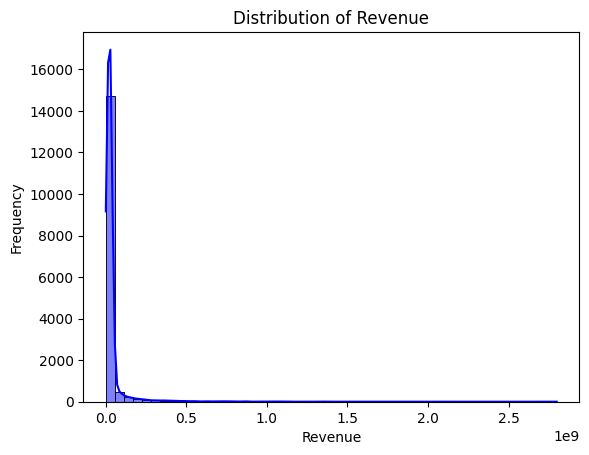

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['revenue'], bins=50, kde=True, color='blue')
plt.title("Distribution of Revenue")
plt.xlabel("Revenue")
plt.ylabel("Frequency")
plt.show()


🔹 Bivariate Analysis (Check feature relationships)

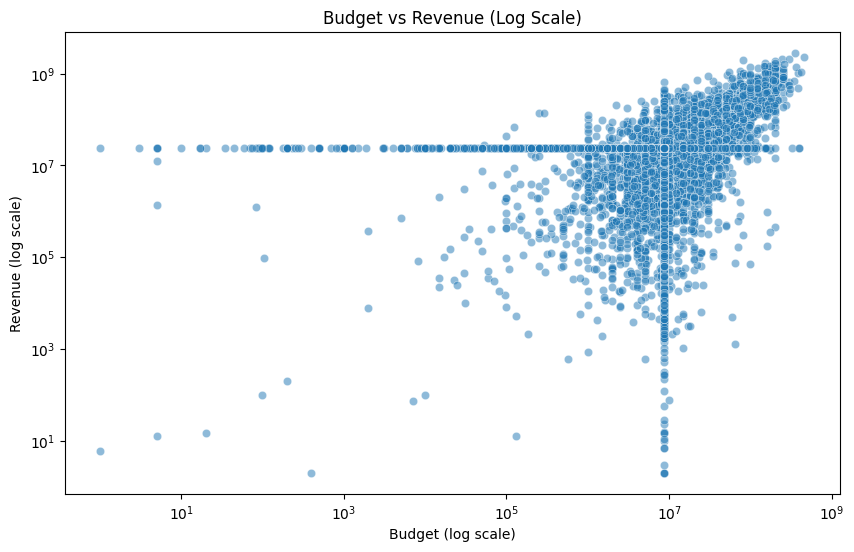

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['budget'], y=df['revenue'], alpha=0.5)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Budget (log scale)")
plt.ylabel("Revenue (log scale)")
plt.title("Budget vs Revenue (Log Scale)")
plt.show()

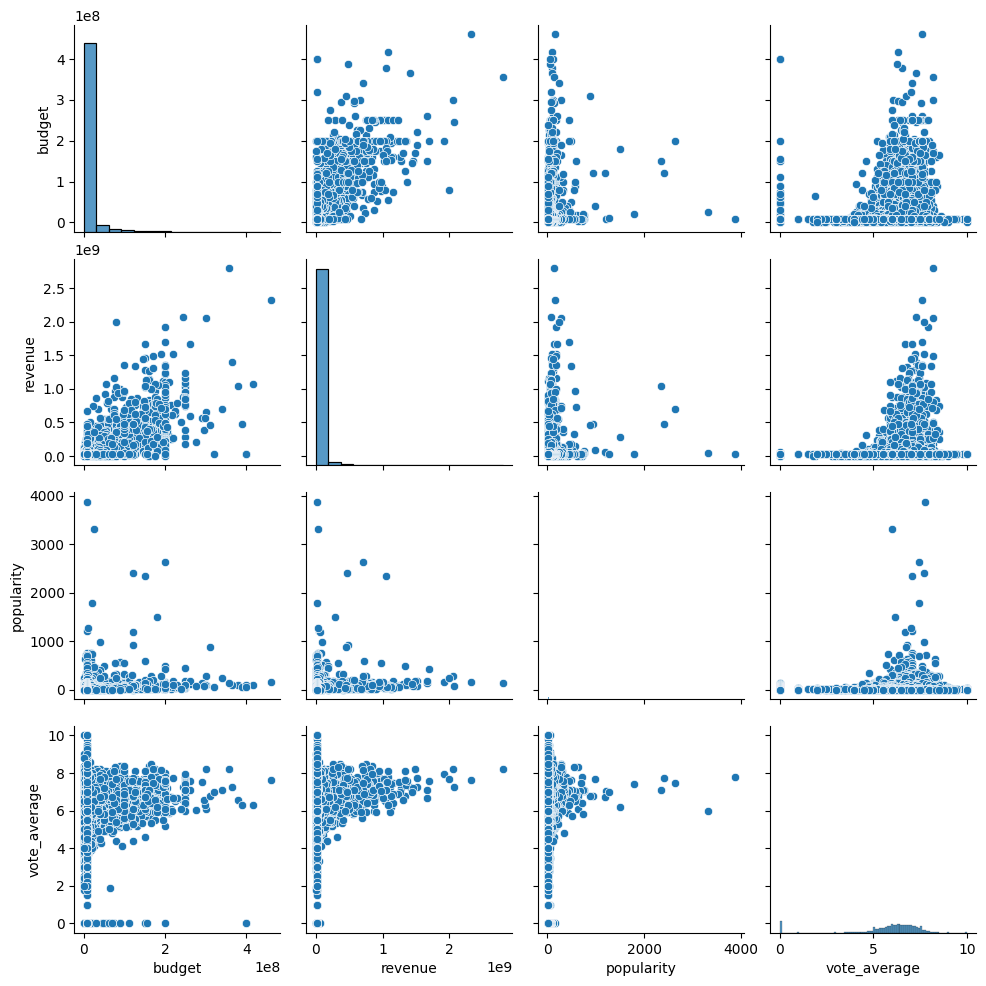

In [ ]:
sns.pairplot(df[['budget', 'revenue', 'popularity', 'vote_average']])
plt.show()

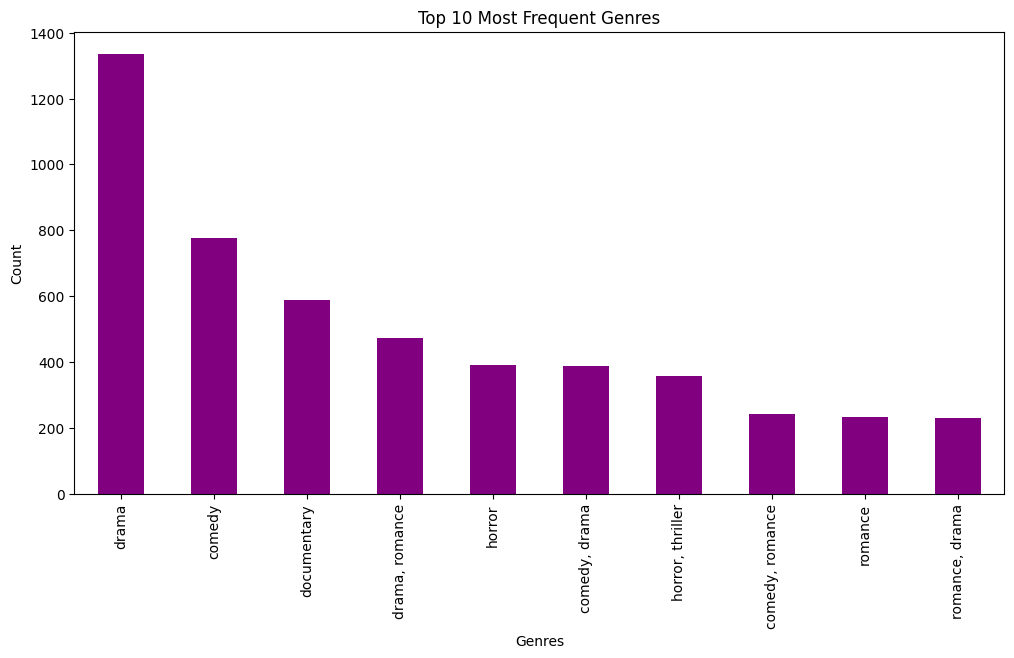

In [ ]:
plt.figure(figsize=(12, 6))
df['genres'].value_counts().head(10).plot(kind='bar', color='purple')
plt.title("Top 10 Most Frequent Genres")
plt.xlabel("Genres")
plt.ylabel("Count")
plt.show()

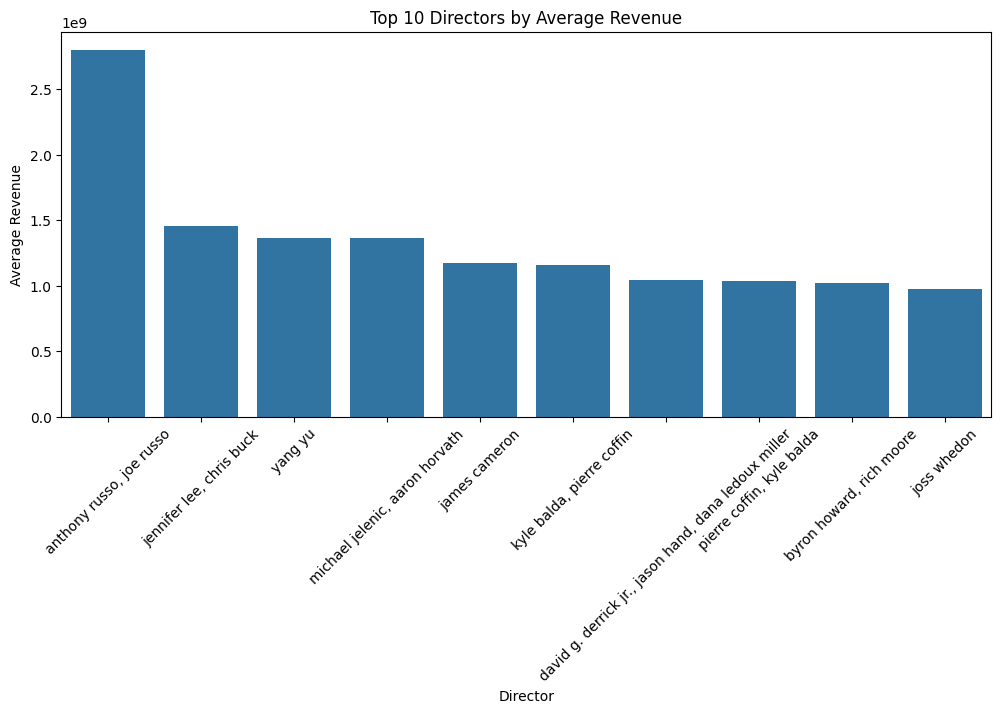

In [ ]:
top_directors = df.groupby('director')['revenue'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 5))
sns.barplot(x=top_directors.index, y=top_directors.values)
plt.xticks(rotation=45)
plt.xlabel('Director')
plt.ylabel('Average Revenue')
plt.title('Top 10 Directors by Average Revenue')
plt.show()

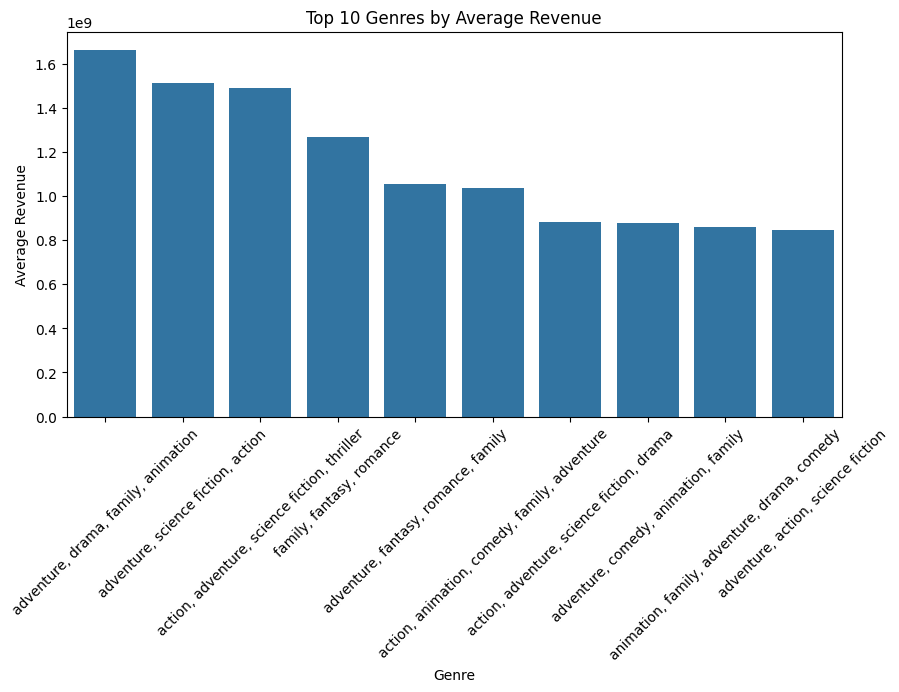

In [ ]:
genre_revenue = df.explode('genres').groupby('genres')['revenue'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=genre_revenue.index, y=genre_revenue.values)
plt.xticks(rotation=45)
plt.xlabel('Genre')
plt.ylabel('Average Revenue')
plt.title('Top 10 Genres by Average Revenue')
plt.show()

* **LabelEncoder to convert categorical columns  into numerical format. This step is usually done to prepare categorical variables for machine learning models, which typically require numerical input.**

In [ ]:
lebel=LabelEncoder()
df['title']=lebel.fit_transform(df['title'])
df["director"]=lebel.fit_transform(df["director"])
df["cast"]=lebel.fit_transform(df["cast"])
df["country"]=lebel.fit_transform(df["country"])
df['genres']=lebel.fit_transform(df['genres'])
df['language']=lebel.fit_transform(df['language'])

In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')


# **Correlation Analysis**

In [ ]:
correlation=df.corr()
correlation

,show_id,title,director,cast,country,date_added,rating,genres,language,popularity,vote_count,vote_average,budget,revenue
show_id,1.000000,0.013397,-0.006157,0.025861,-0.017032,0.926705,-0.325255,0.062456,0.134985,0.096656,-0.185147,-0.325255,-0.114005,-0.091608
title,0.013397,1.000000,-0.000008,0.009444,-0.006928,0.017928,0.004860,0.004892,0.000356,0.002105,0.013213,0.004860,0.013884,0.003440
director,-0.006157,-0.000008,1.000000,0.048434,-0.015061,-0.017970,0.002919,-0.038166,0.068324,-0.002292,-0.018706,0.002919,-0.008602,-0.005799
cast,0.025861,0.009444,0.048434,1.000000,-0.016030,0.009622,-0.026691,-0.016989,0.094514,-0.006190,-0.027490,-0.026691,-0.017440,0.002633
country,-0.017032,-0.006928,-0.015061,-0.016030,1.000000,-0.017316,-0.040918,0.009879,-0.126281,0.032992,0.098164,-0.040918,0.082299,0.072058
date_added,0.926705,0.017928,-0.017970,0.009622,-0.017316,1.000000,-0.219923,0.052804,0.085088,0.132825,-0.104657,-0.219923,-0.013569,-0.028431
rating,-0.325255,0.004860,0.002919,-0.026691,-0.040918,-0.219923,1.000000,-0.088761,-0.024138,0.071178,0.173600,1.000000,0.085798,0.095145
genres,0.062456,0.004892,-0.038166,-0.016989,0.009879,0.052804,-0.088761,1.000000,-0.049558,-0.053025,-0.093638,-0.088761,-0.152022,-0.120156
language,0.134985,0.000356,0.068324,0.094514,-0.126281,0.085088,-0.024138,-0.049558,1.000000,-0.020449,-0.138232,-0.024138,-0.093666,-0.037892
popularity,0.096656,0.002105,-0.002292,-0.006190,0.032992,0.132825,0.071178,-0.053025,-0.020449,1.000000,0.158254,0.071178,0.214703,0.211075


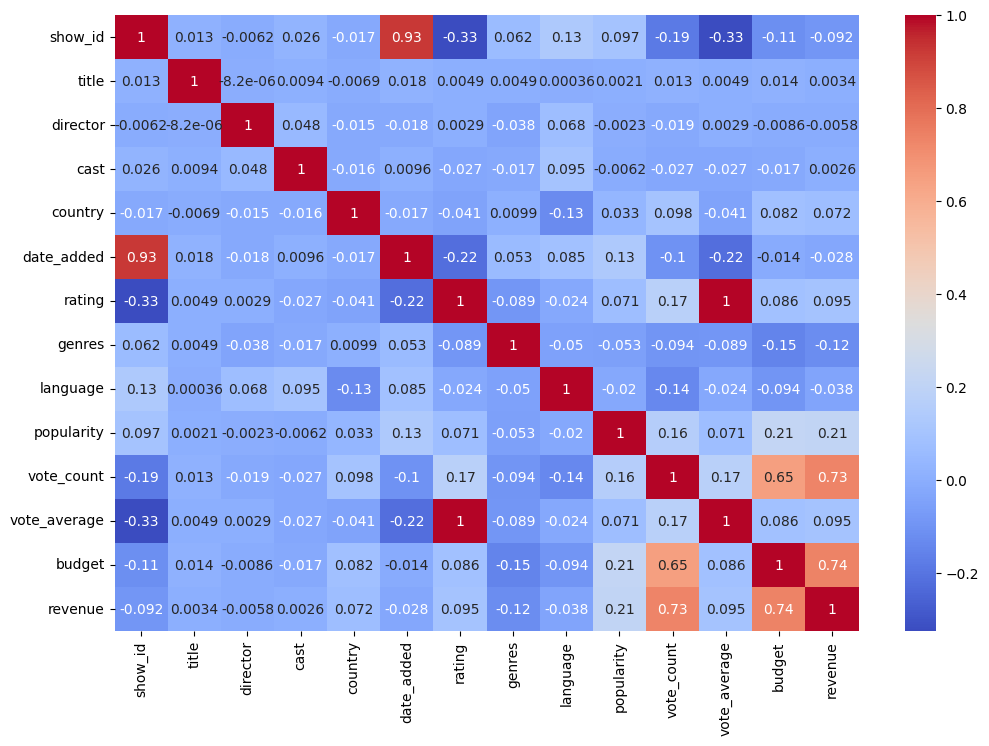

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


In [ ]:
df.drop(["show_id"],inplace=True,axis=1)
df.drop(["cast"],inplace=True,axis=1)

In [ ]:
df.columns

Index(['title', 'director', 'country', 'date_added', 'rating', 'genres',
       'language', 'popularity', 'vote_count', 'vote_average', 'budget',
       'revenue'],
      dtype='object')

# **Outlier Detection**

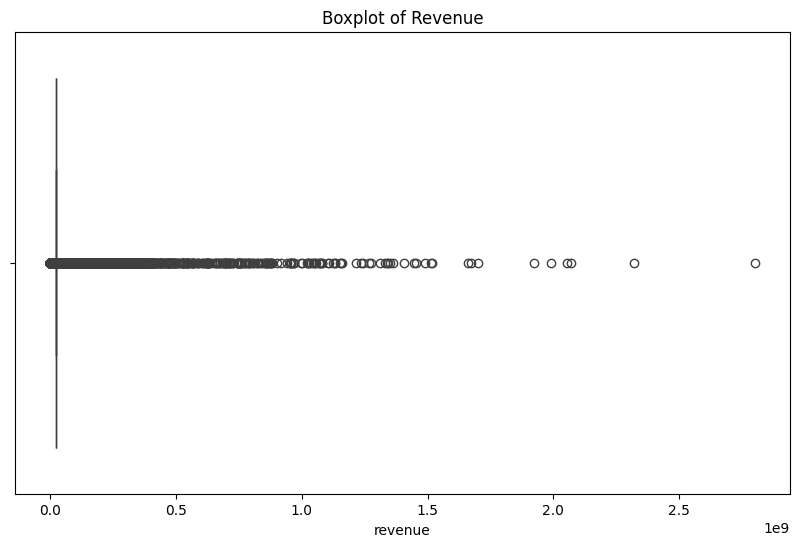

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['revenue'])
plt.title("Boxplot of Revenue")
plt.show()


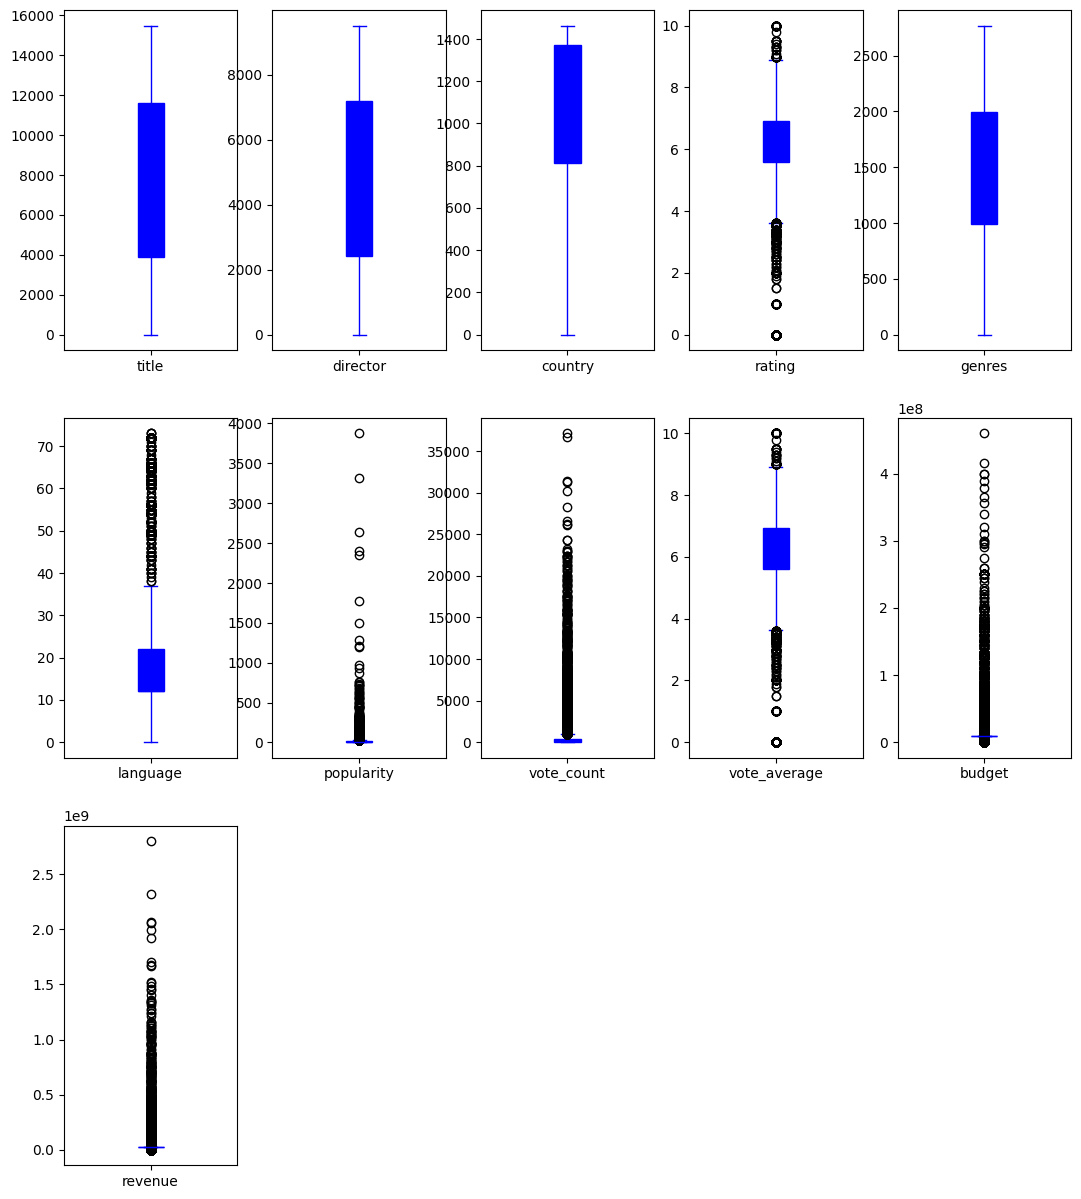

In [ ]:
df.plot(kind='box',subplots=True,layout=(3,5),figsize=(13,15),color='blue',patch_artist=True)
plt.show()

In [ ]:
# import pandas as pd

# def remove_outliers_iqr(df, column):
#     Q1 = df[column].quantile(0.25)
#     Q3 = df[column].quantile(0.75)
#     IQR = Q3 - Q1

#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR

#     df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
#     return df_cleaned

# # Columns with outliers to clean
# columns_to_clean =['vote_count','language']

# for col in columns_to_clean:
#     df = remove_outliers_iqr(df, col)



In [ ]:
df

,title,director,country,date_added,rating,genres,language,popularity,vote_count,vote_average,budget,revenue
0,10468,6324,1371,2010-05-16,6.380,1017,12,203.893,7449,6.380,1.650000e+08,7.526009e+08
1,5888,1678,1352,2010-07-15,8.369,319,12,156.242,37119,8.369,1.600000e+08,8.390306e+08
2,5174,2184,1352,2010-11-17,7.744,506,12,121.191,19327,7.744,2.500000e+08,9.543059e+08
3,11368,1302,1371,2010-11-24,7.600,817,12,111.762,11638,7.600,2.600000e+08,5.924617e+08
4,5579,1598,1371,2010-03-18,7.800,1805,12,110.044,13259,7.800,1.650000e+08,4.948795e+08
...,...,...,...,...,...,...,...,...,...,...,...,...
15995,4319,6457,454,2025-02-24,0.000,2101,13,4.931,0,0.000,8.766792e+06,2.446308e+07
15996,7381,9110,1204,2025-03-13,0.000,1364,56,4.930,0,0.000,8.766792e+06,2.446308e+07
15997,8395,627,1129,2025-01-28,1.000,1946,12,4.922,1,1.000,8.766792e+06,2.446308e+07
15998,369,1950,1129,2025-03-10,0.000,2228,12,4.921,0,0.000,8.766792e+06,2.446308e+07


In [ ]:
df.shape

(16000, 12)

# **Data Scalling**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['vote_count','popularity','budget', 'revenue']] = scaler.fit_transform(df[['vote_count','popularity','budget', 'revenue']])


#  **Feature Engineering**

In [ ]:
# Extract year, month, and day from 'date_added'
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df['day_added'] = df['date_added'].dt.day


In [ ]:
# Drop the original 'date_added' column
df.drop(columns=['date_added'], inplace=True)

# **Feature-Target Split**

In [ ]:
# Define target and features (include the new date features)
X = df.drop(columns=['revenue'])
y = df['revenue']

# **Train-Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor
import numpy as np

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Model Selection & Training**


In [ ]:
def evaluate_model(y_true, y_pred, model_name):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"\n📊 {model_name}")
    print(f"R²: {r2:.4f} | MAE: {mae:.2f} | RMSE: {rmse:.2f}")

In [ ]:
# Models to train
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "KNN Regressor": KNeighborsRegressor(n_neighbors=5),
    "XGBoost Regressor": XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=6, random_state=42)
}

In [ ]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    evaluate_model(y_test, y_pred, name)


📊 Linear Regression
R²: 0.6730 | MAE: 0.01 | RMSE: 0.02

📊 Random Forest
R²: 0.7378 | MAE: 0.01 | RMSE: 0.02

📊 Decision Tree
R²: 0.2473 | MAE: 0.01 | RMSE: 0.03

📊 KNN Regressor
R²: -0.1840 | MAE: 0.02 | RMSE: 0.04

📊 XGBoost Regressor
R²: 0.7482 | MAE: 0.01 | RMSE: 0.02


# **Deployment**

In [ ]:
import pickle
pickle.dump(model,open('model.pkl','wb'))
